In [1]:
!pip3 install -q kaggle==1.5.12

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pko89403","key":"2037eafb610ee0ebf9f2c5fc819d836a"}'}

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [6]:
 !chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-11 07:33:11           2432  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1409  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1055  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            241  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [8]:
!kaggle competitions download -c word2vec-nlp-tutorial

 73% 19.0M/26.0M [00:00<00:00, 86.7MB/s]
100% 26.0M/26.0M [00:00<00:00, 85.8MB/s]
  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 118MB/s]
 71% 9.00M/12.6M [00:00<00:00, 36.2MB/s]
100% 12.6M/12.6M [00:00<00:00, 42.1MB/s]
 69% 9.00M/13.0M [00:00<00:00, 41.0MB/s]
100% 13.0M/13.0M [00:00<00:00, 51.2MB/s]


In [9]:
import zipfile

DATA_IN_PATH = '/content/'

file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()


In [10]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [11]:
train_data = pd.read_csv(DATA_IN_PATH + file_list[0].replace('.zip',''), header=0, delimiter='\t', quoting=3)

In [12]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [13]:
print("File Size")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print("   ", file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

File Size
    labeledTrainData.tsv          33.56MB
    unlabeledTrainData.tsv        67.28MB
    testData.tsv                  32.72MB


In [14]:
print('Total Train Data : {}'.format(len(train_data)))

Total Train Data : 25000


In [15]:
train_data_length = train_data['review'].apply(len)
train_data_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

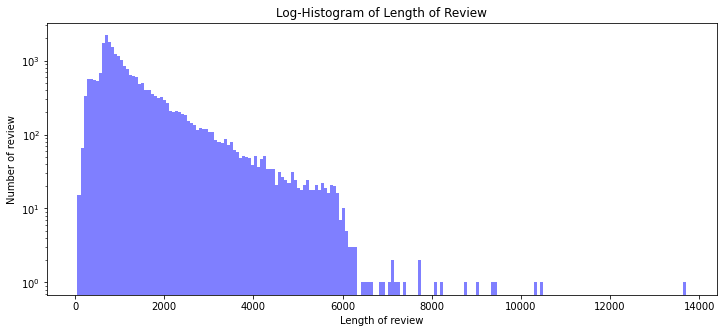

In [16]:
plt.figure(figsize=(12,5)) # 그래프에 대한 이미지 크기 선언 ( 가로, 세로 )
plt.hist(train_data_length, bins=200, alpha=.5, color='blue', label='word')
plt.yscale('log', nonposy='clip')
plt.title("Log-Histogram of Length of Review")
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [17]:
print('Max Review Length : {}'.format(np.max(train_data_length)))
print('Min Review Length : {}'.format(np.min(train_data_length)))
print('Mean Review Length : {}'.format(np.mean(train_data_length)))
print('Std Review Length : {}'.format(np.std(train_data_length)))
print('Med Review Length : {}'.format(np.median(train_data_length)))
print('25% Review Length : {}'.format(np.percentile(train_data_length, 25)))
print('75% Review Length : {}'.format(np.percentile(train_data_length, 75)))

Max Review Length : 13710
Min Review Length : 54
Mean Review Length : 1329.71056
Std Review Length : 1005.2191407969154
Med Review Length : 983.0
25% Review Length : 705.0
75% Review Length : 1619.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f74229f6e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f74229f9e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7422a03450>],
 'means': [<matplotlib.lines.Line2D at 0x7f74229fded0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f74229fd990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74229f9410>,
  <matplotlib.lines.Line2D at 0x7f74229f9950>]}

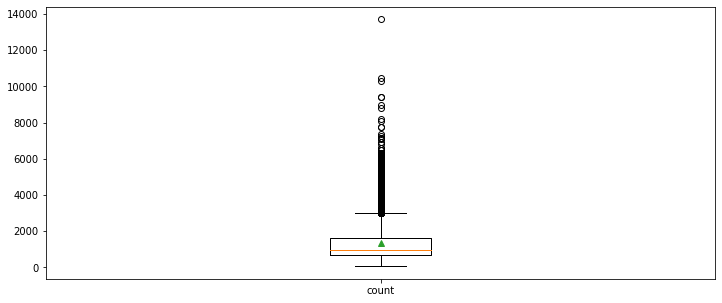

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_data_length, labels=['count'], showmeans=True)

In [19]:
!pip3 install -q wordcloud

(-0.5, 799.5, 599.5, -0.5)

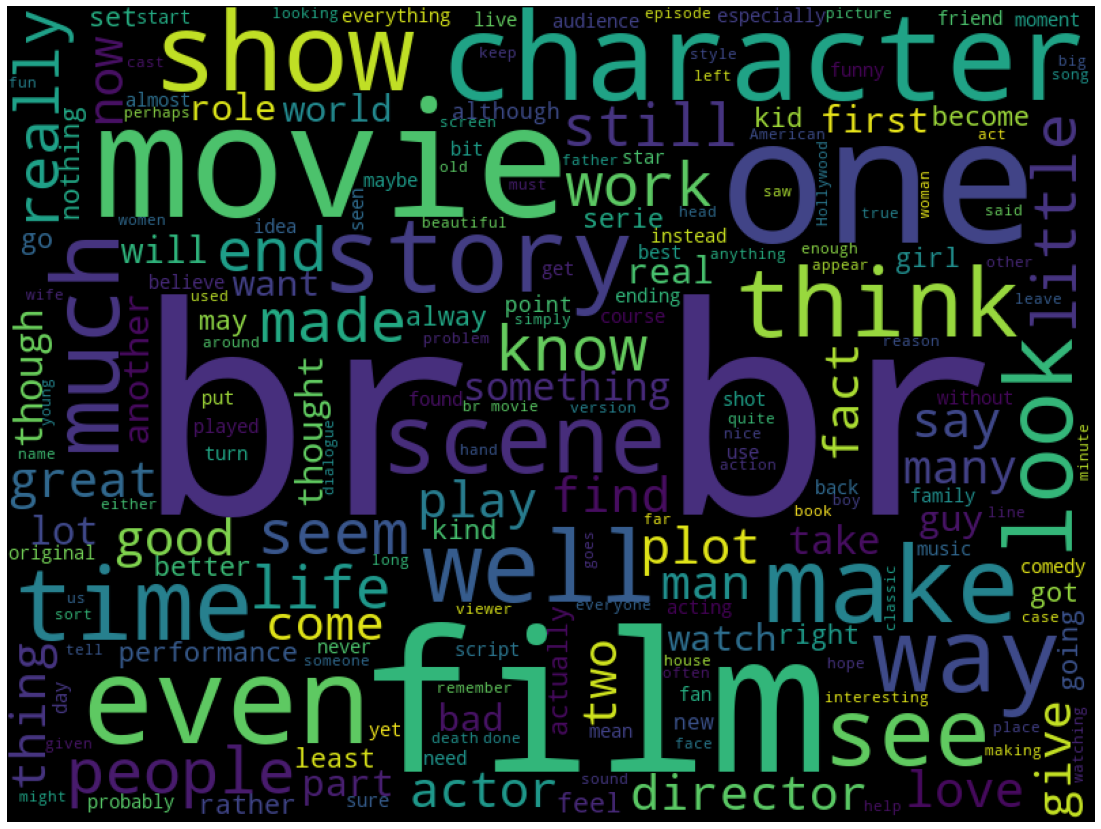

In [20]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(' '.join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


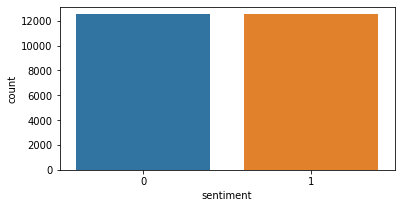

In [21]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [22]:
print('positive review count : {}'.format(train_data['sentiment'].value_counts()[1]))
print('negative review count : {}'.format(train_data['sentiment'].value_counts()[0]))

positive review count : 12500
negative review count : 12500


In [23]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

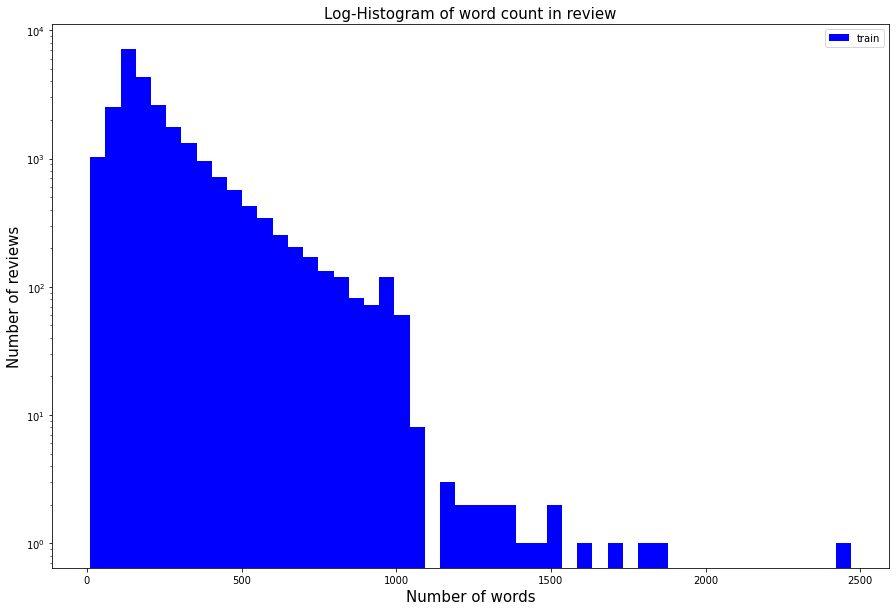

In [24]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='b', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [25]:
print('Max Review Word Length : {}'.format(np.max(train_word_counts)))
print('Min Review Word Length : {}'.format(np.min(train_word_counts)))
print('Mean Review Word Length : {}'.format(np.mean(train_word_counts)))
print('Std Review Word Length : {}'.format(np.std(train_word_counts)))
print('Med Review Word Length : {}'.format(np.median(train_word_counts)))
print('25% Review Word Length : {}'.format(np.percentile(train_word_counts, 25)))
print('75% Review Word Length : {}'.format(np.percentile(train_word_counts, 75)))

Max Review Word Length : 2470
Min Review Word Length : 10
Mean Review Word Length : 233.78624
Std Review Word Length : 173.74237015380743
Med Review Word Length : 174.0
25% Review Word Length : 127.0
75% Review Word Length : 284.0


In [26]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

print('물음표 : {:.2f}%'.format(qmarks * 100))
print('마침표 : {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 : {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문 : {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문 : {:.2f}%'.format(numbers * 100))

물음표 : 29.55%
마침표 : 99.69%
첫 글자가 대문자 : 0.00%
대문자가 있는 질문 : 99.59%
숫자가 있는 질문 : 56.66%
